In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/cancer.csv"
df = pd.read_csv(url)
breast_set = load_breast_cancer()

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Pre-processing**

In [ ]:
dataset = df.drop('id',  axis=1)
diagnosis = dataset.pop('diagnosis')
dataset.insert(30,'label',diagnosis)

dataset.columns = np.append(breast_set.feature_names, 'diagnosis')
dataset['diagnosis'].replace('B', 0, inplace=True)
dataset['diagnosis'].replace('M', 1, inplace=True)

x = dataset.iloc[:,:30].values
y = dataset.iloc[:, 30].values

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

**Logistic Regression**

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

**Model Evaluation and Plotting**

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 2 45]]


Text(0.5, 427.9555555555555, 'Predicted Result')

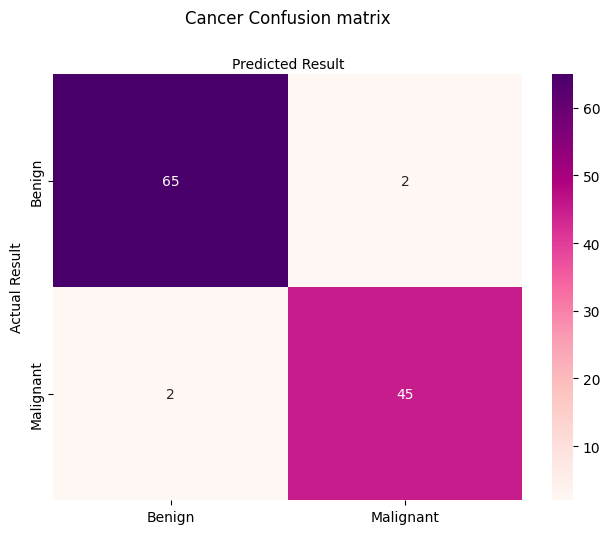

In [ ]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="RdPu",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')

**Parameter Penalty**

In [ ]:
C = [10, 5, 1, .1, .001]
X_train =  x_train
X_test = x_test

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(X_train, y_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(X_test, y_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 5
Training accuracy:	0.9868
Test accuracy:		0.9649

C: 1
Training accuracy:	0.9912
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



**Logistic Regression with Parameters Penalty**

In [ ]:
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)

Y_pred = clf.predict(X_test)

param_cnf_matrix = confusion_matrix(y_test, Y_pred)

**Model Evaluation and Plotting with Parameters Penalty**

Model Accuracy:	 0.9737
Model Precision: 0.9783
Model Recall:	 0.9574
Model F1 Score:	 0.9677 



Text(0.5, 427.9555555555555, 'Predicted Result')

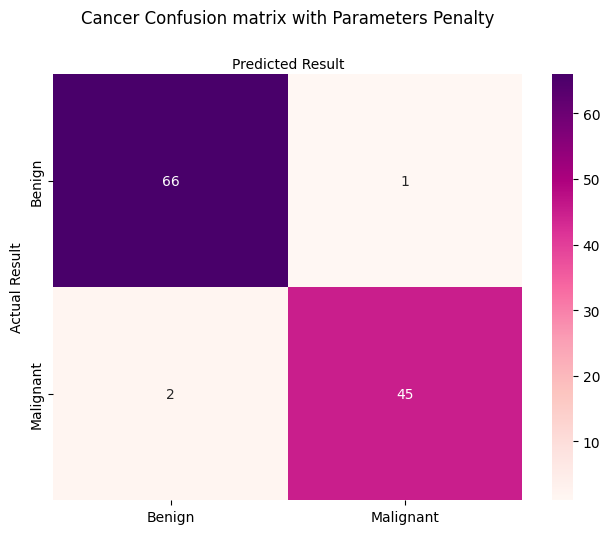

In [ ]:
print("Model Accuracy:\t %5.4f" %metrics.accuracy_score(y_test, Y_pred))
print("Model Precision: %5.4f" %metrics.precision_score(y_test, Y_pred))
print("Model Recall:\t %5.4f" %metrics.recall_score(y_test, Y_pred))
print("Model F1 Score:\t %5.4f" %metrics.f1_score(y_test, Y_pred), "\n")

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(param_cnf_matrix), annot=True, cmap ="RdPu",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix with Parameters Penalty', y=1.1)
plt.ylabel('Actual Result')
plt.xlabel('Predicted Result')